In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date

In [2]:
start = '2010-01-01'
end = date.today().strftime('%Y-%m-%d')

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546385
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442254
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-01,139.039993,135.660004,136.039993,138.929993,71007500.0,138.929993
2022-07-05,141.610001,136.929993,137.770004,141.559998,73353800.0,141.559998
2022-07-06,144.119995,141.080002,141.350006,142.919998,74064300.0,142.919998
2022-07-07,146.550003,143.279999,143.289993,146.350006,66253700.0,146.350006
2022-07-08,147.550003,145.000000,145.259995,147.039993,64493200.0,147.039993


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546385
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442254
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


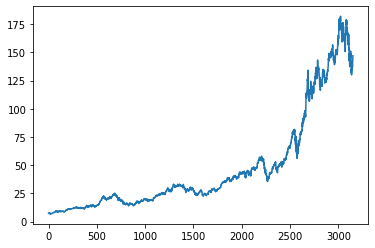

In [6]:
plt.plot(df.Close)

In [7]:
## 100 MA ##
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3146    156.896701
3147    156.564001
3148    156.230401
3149    155.972701
3150    155.756701
Name: Close, Length: 3151, dtype: float64

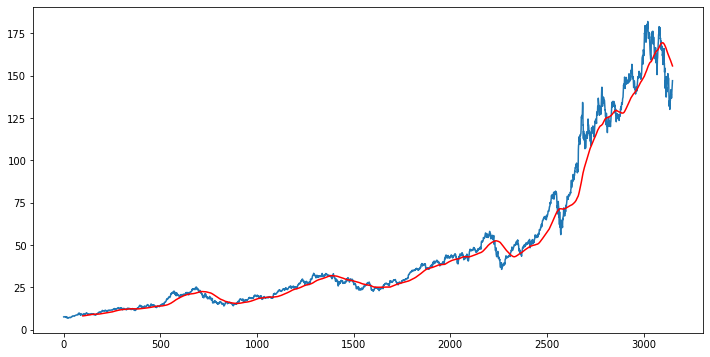

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
## 200 MA ##
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3146    158.30550
3147    158.26935
3148    158.25365
3149    158.27070
3150    158.28875
Name: Close, Length: 3151, dtype: float64

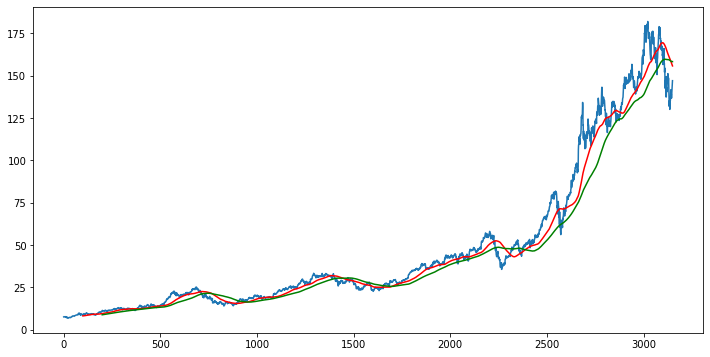

In [10]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(3151, 5)

In [12]:
## splitting data into training and testing

## "int(len(df)*0.70" is 70% value of data
    
data_training = pd.DataFrame(df['Close'][0: int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
                            
print(data_training.shape)
print(data_testing.shape)                            

(2205, 1)
(946, 1)


In [13]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [14]:
data_testing.head()

,Close
2205,56.997501
2206,56.072498
2207,55.942501
2208,56.717499
2209,54.090000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.97649459],
       [0.98636588],
       [1.        ]])

In [17]:
data_training_array.shape

(2205, 1)

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(2105, 100, 1)

In [20]:
## Machine Learning Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

## 1st layer ##
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


## 2nd layer ##
model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

    
## 3rd layer ##
model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

               
## 4th layer ##
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
               
               
## dense layer: to connect all those above layers ##
model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
66/66 [==============================] - 10s 106ms/step - loss: 0.0257
Epoch 2/50
66/66 [==============================] - 7s 101ms/step - loss: 0.0055
Epoch 3/50
66/66 [==============================] - 7s 101ms/step - loss: 0.0053
Epoch 4/50
66/66 [==============================] - 7s 105ms/step - loss: 0.0043
Epoch 5/50
66/66 [==============================] - 7s 103ms/step - loss: 0.0049
Epoch 6/50
66/66 [==============================] - 7s 102ms/step - loss: 0.0042
Epoch 7/50
66/66 [==============================] - 7s 104ms/step - loss: 0.0040
Epoch 8/50
66/66 [==============================] - 7s 111ms/step - loss: 0.0036
Epoch 9/50
66/66 [==============================] - 7s 112ms/step - loss: 0.0034
Epoch 10/50
66/66 [==============================] - 7s 111ms/step - loss: 0.0032
Epoch 11/50
66/66 [==============================] - 7s 110ms/step - loss: 0.0035
Epoch 12/50
66/66 [==============================] - 7s 111ms/step - loss: 0.0030
Epoch 13/50
66/66 [=====

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
2205,56.997501
2206,56.072498
2207,55.942501
2208,56.717499
2209,54.090000


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = past_100_days.append(data_testing, ignore_index= True)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_8896\3501726630.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index= True)


In [28]:
final_df.head()

,Close
0,47.037498
1,46.610001
2,47.044998
3,46.747501
4,46.577499


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0784501 ],
       [0.07553128],
       [0.07850131],
       ...,
       [0.73310576],
       [0.75652478],
       [0.76123579]])

In [30]:
input_data.shape

(1046, 1)

In [31]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(946, 100, 1)
(946,)


In [33]:
## Making predictions ##
y_predicted = model.predict(x_test)

30/30 [==============================] - 1s 34ms/step


In [34]:
y_predicted.shape

(946, 1)

In [35]:
y_test

array([0.14645388, 0.14013825, 0.13925067, 0.14454211, 0.12660237,
       0.12334215, 0.13641717, 0.1283093 , 0.13648544, 0.13484681,
       0.12602203, 0.13163779, 0.13392506, 0.13747546, 0.12443458,
       0.13247419, 0.12649996, 0.11956987, 0.1213792 , 0.13086968,
       0.13660494, 0.1114449 , 0.10139113, 0.10511224, 0.115661  ,
       0.11316891, 0.10630708, 0.08872578, 0.08541435, 0.07614578,
       0.08401469, 0.08763335, 0.07454126, 0.05938379, 0.05904241,
       0.05137833, 0.05535546, 0.05470684, 0.06614321, 0.06377059,
       0.06211488, 0.07276608, 0.0588888 , 0.05552616, 0.04489204,
       0.04678673, 0.04513101, 0.04593327, 0.04909106, 0.03975419,
       0.03712555, 0.0407613 , 0.03191943, 0.02498933, 0.0145771 ,
       0.00792012, 0.02556968, 0.02382861, 0.02396517, 0.02654264,
       0.02684987, 0.        , 0.010361  , 0.00979771, 0.01461125,
       0.01898096, 0.01981736, 0.01723989, 0.01333105, 0.01857132,
       0.02176325, 0.02333362, 0.02497227, 0.0189639 , 0.02002

In [36]:
y_predicted

array([[0.18920645],
       [0.18946478],
       [0.1898677 ],
       [0.19037181],
       [0.19094114],
       [0.19150522],
       [0.19199297],
       [0.1923649 ],
       [0.19259056],
       [0.19266497],
       [0.19259676],
       [0.19239064],
       [0.19206244],
       [0.19163811],
       [0.19115515],
       [0.19062953],
       [0.19008325],
       [0.1895278 ],
       [0.18895923],
       [0.18837178],
       [0.18777573],
       [0.18719971],
       [0.1866332 ],
       [0.18604249],
       [0.18539354],
       [0.18467444],
       [0.18388425],
       [0.18302116],
       [0.18207003],
       [0.18101299],
       [0.17982867],
       [0.17850587],
       [0.17704405],
       [0.17544763],
       [0.17371254],
       [0.17183727],
       [0.16982004],
       [0.16766931],
       [0.1654026 ],
       [0.16305949],
       [0.1606867 ],
       [0.15833116],
       [0.15605015],
       [0.15388235],
       [0.15184939],
       [0.1499494 ],
       [0.14817181],
       [0.146

In [37]:
scaler.scale_

array([0.00682769])

In [38]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

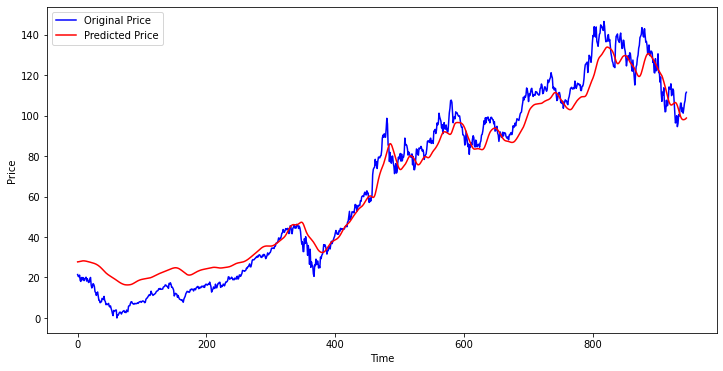

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()